# NetCDF 文件简介

## 1. NetCDF 文件是什么

NetCDF（**Network Common Data Form**）是一种用于存储科学数据的自描述、平台无关的文件格式，广泛应用于气象、海洋、遥感和地球科学领域。它可以存储多维数组（如时间、纬度、经度、通道等），并提供变量和属性的元信息。

特点：
- **多维数组存储**：可以存储二维、三维或更高维的数据，例如 `[time, lat, lon]`、`[channel, lat, lon]`。
- **自描述性**：文件内部包含变量名、单位、维度信息和属性。
- **跨平台和语言支持**：支持 Python（`netCDF4`）、MATLAB、Fortran、C/C++ 等。

---

## 2. NetCDF 文件的组成

### 2.1 维度 (Dimensions)
- 描述数组的尺寸，如 `time`、`latitude`、`longitude`、`channel`。
- 每个维度都有一个长度，可以是固定长度或无限长度（可增长）。

### 2.2 变量 (Variables)
- 核心存储数据的对象，每个变量对应一个多维数组。
- 每个变量有：
  - **名称**：唯一标识
  - **维度**：数据的轴，例如 `[time, lat, lon]`
  - **数据类型**：如 `float32`、`int16`
  - **属性 (Attributes)**：如单位、长名、填充值 `_FillValue` 等  

示例变量：
```python
albedo_01   shape: [lat, lon], dtype: float32
albedo_02   shape: [lat, lon], dtype: float32
tbb_13      shape: [lat, lon], dtype: float32
latitude    shape: [lat], dtype: float32
longitude   shape: [lon], dtype: float32
CLTH        shape: [lat, lon], dtype: float32
```

### 2.3 全局属性 (Global Attributes)
- 描述整个文件的元信息，例如文件生成时间、数据源、卫星信息等。

---

## 3. 变量的存储方式

- **数组存储**：变量通常以 NumPy 数组形式存储，支持多维索引。
- **标量属性**：每个变量可能有 `_FillValue` 表示缺测值，存储为特定数值。
- **压缩存储**：NetCDF 支持 zlib 压缩，可以节省存储空间。
- **数据类型**：浮点型 (`float32`/`float64`) 用于连续变量，整型 (`int16`/`int32`) 用于分类或编码变量。

---

## 4. NetCDF 文件主要用途

1. **科学数据存储**：气象、海洋、遥感数据的长期存储和共享。
2. **多维分析**：支持时间序列、空间网格、波段通道的数据分析。
3. **可视化**：快速生成栅格图、卫星图像、时间序列曲线。
4. **模型输入/输出**：数值模拟模型（如 WRF、ERA5）常用 NetCDF 读写。

---

## 5. 变量处理方式

### 5.1 读取变量
```python
import netCDF4 as nc
dataset = nc.Dataset("file.nc")
var = dataset.variables["albedo_01"][:]  # 提取完整数组
```
### 5.2 缺失值处理
```python
_fill = dataset.variables["albedo_01"]._FillValue
var[var==_fill] = np.nan  # 转为 NaN
```
### 5.3 裁剪和子集选择
```python
var_subset = var[100:200, 150:250]  # 裁剪空间范围
```
### 5.4 插值和重采样
1. 可使用 scipy.interpolate 或 cv2.resize、numpy 自定义插值方法。
2. 用于匹配不同分辨率或生成统一网格。
## 6. 保存变量为 NumPy 或图片
```python
np.save("albedo01.npy", var)
from PIL import Image
im = Image.fromarray(var_uint8)
im.save("albedo01.png")
```

In [1]:
# ======================
# Cell 1: 导入依赖
# ======================
import netCDF4 as nc
import numpy as np
import cv2
import matplotlib.pyplot as plt

def resize_with_numpy(original_array, new_size):
    """
    使用numpy对原始数组进行插值，从原始大小调整到新大小。
    参数:
        original_array (numpy.ndarray): 原始数组
        new_size (tuple): 新的尺寸，例如 (1024, 1024)
    返回:
        numpy.ndarray: 调整后的数组
    """
    x = np.linspace(0, original_array.shape[1] - 1, new_size[1])
    y = np.linspace(0, original_array.shape[0] - 1, new_size[0])
    x_new, y_new = np.meshgrid(x, y)
    x_old = np.clip(np.round(x_new).astype(int), 0, original_array.shape[1] - 1)
    y_old = np.clip(np.round(y_new).astype(int), 0, original_array.shape[0] - 1)
    resized_array = original_array[y_old, x_old]
    return resized_array

In [2]:
# ======================
# Cell 2: 打开 NetCDF 文件并查看所有变量
# ======================
file_path = '/data/xmr/xmrcode/download_h8/data/NC/NC_H09_20250307_0400_R21_FLDK.02401_02401.nc'
dataset = nc.Dataset(file_path)

print("📌 可用变量：")
for var in dataset.variables.keys():
    print(f" - {var}: {dataset.variables[var].shape}")

📌 可用变量：
 - latitude: (2401,)
 - longitude: (2401,)
 - band_id: (16,)
 - start_time: (1,)
 - end_time: (1,)
 - geometry_parameters: (17,)
 - albedo_01: (2401, 2401)
 - albedo_02: (2401, 2401)
 - albedo_03: (2401, 2401)
 - sd_albedo_03: (2401, 2401)
 - albedo_04: (2401, 2401)
 - albedo_05: (2401, 2401)
 - albedo_06: (2401, 2401)
 - tbb_07: (2401, 2401)
 - tbb_08: (2401, 2401)
 - tbb_09: (2401, 2401)
 - tbb_10: (2401, 2401)
 - tbb_11: (2401, 2401)
 - tbb_12: (2401, 2401)
 - tbb_13: (2401, 2401)
 - tbb_14: (2401, 2401)
 - tbb_15: (2401, 2401)
 - tbb_16: (2401, 2401)
 - SAZ: (2401, 2401)
 - SAA: (2401, 2401)
 - SOZ: (2401, 2401)
 - SOA: (2401, 2401)
 - Hour: (2401, 2401)


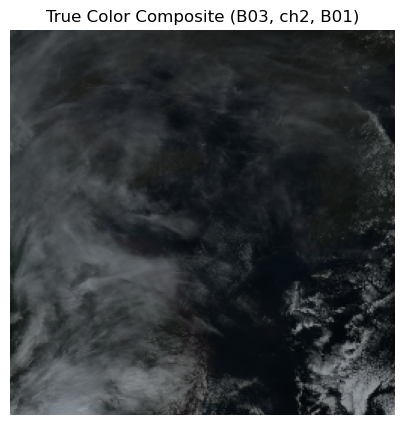

In [3]:
# ======================
# Cell 3: 构建 True Color 合成 (B03, ch2, B01)
# ======================
B01 = np.array(dataset.variables['albedo_01'])
B02 = np.array(dataset.variables['albedo_02'])
B03 = np.array(dataset.variables['albedo_03'])
B04 = np.array(dataset.variables['albedo_04'])

# 构造合成通道
ch2 = B02*0.8 + B04*0.2

# 归一化到 0-255
def normalize_to_uint8(arr):
    return ((arr - np.nanmin(arr)) / (np.nanmax(arr) - np.nanmin(arr)) * 255).astype(np.uint8)

B01 = normalize_to_uint8(B01)
B02 = normalize_to_uint8(B02)
B03 = normalize_to_uint8(B03)
ch2 = normalize_to_uint8(ch2)

# 裁剪
B01 = B01[370:626, 724:980]
B02 = B02[370:626, 724:980]
B03 = B03[370:626, 724:980]
ch2 = ch2[370:626, 724:980]

# 插值到 1024×1024
B01 = resize_with_numpy(B01,(1024,1024))
B02 = resize_with_numpy(B02,(1024,1024))
B03 = resize_with_numpy(B03,(1024,1024))
ch2 = resize_with_numpy(ch2,(1024,1024))

# 堆叠为RGB图像
rgb_image = np.stack([B03, ch2, B01], axis=-1)

plt.figure(figsize=(5,5))
plt.imshow(rgb_image)
plt.title("True Color Composite (B03, ch2, B01)")
plt.axis("off")
plt.show()

In [4]:
from PIL import Image
import numpy as np

# 假设 img 是你的三通道数组，shape 可以是 [H,W,3] 或 [3,H,W]
img = rgb_image

# 如果是 [3,H,W]，先转为 [H,W,3]
if img.ndim == 3 and img.shape[0] == 3:
    img = np.transpose(img, (1,2,0))

# 归一化到 0-255，并转换为 uint8
if img.dtype != np.uint8:
    img = np.clip(img, 0, 255)
    img = img.astype(np.uint8)

# 创建 Image 对象并保存
im = Image.fromarray(img)
im.save("/data/xmr/xmrcode/data_process/data/output/h9/output.png")